In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset paths
p_mat = r"./input/student-mat.csv"
p_por = r"./input/student-por.csv"

# Load
df_mat = pd.read_csv(p_mat, sep=",", encoding="utf-8-sig")
df_por = pd.read_csv(p_por, sep=",", encoding="utf-8-sig")

# Clean column names
df_mat.columns = df_mat.columns.str.strip()
df_por.columns = df_por.columns.str.strip()

# Add subject label 
df_mat["subject"] = "math"
df_por["subject"] = "portuguese"

# eep only common columns (intersection)
common_cols = sorted(set(df_mat.columns).intersection(set(df_por.columns)))

# (sanity check: subject must be present)
assert "subject" in common_cols, "'subject' is not present in the common columns"

# Concatenate all observations (stack verticale)
df_merge = pd.concat([df_mat[common_cols], df_por[common_cols]], ignore_index=True)

print("df_mat shape:", df_mat.shape)
print("df_por shape:", df_por.shape)
print("df_merge shape:", df_merge.shape)
print(df_merge["subject"].value_counts(dropna=False))
print("Columns in df_merge:", len(df_merge.columns))

df_mat shape: (395, 34)
df_por shape: (649, 34)
df_merge shape: (1044, 34)
subject
portuguese    649
math          395
Name: count, dtype: int64
Columns in df_merge: 34


In [3]:
df_merge.head()

,Dalc,Fedu,Fjob,G1,G2,G3,Medu,Mjob,Pstatus,Walc,...,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,subject,traveltime
0,1,4,teacher,5,6,6,4,at_home,A,1,...,yes,no,course,no,GP,yes,F,2,math,2
1,1,1,other,5,5,6,1,at_home,T,1,...,no,no,course,no,GP,no,F,2,math,1
2,2,1,other,7,8,10,1,at_home,T,3,...,yes,yes,other,no,GP,yes,F,2,math,1
3,1,2,services,15,14,15,4,health,T,1,...,yes,yes,home,yes,GP,no,F,3,math,1
4,1,3,other,6,10,10,3,other,T,2,...,yes,yes,home,no,GP,no,F,2,math,1


In [4]:
num_cols = df_merge.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_merge.select_dtypes(include=["object"]).columns

In [5]:
for col in cat_cols:
    print("\n", col)
    print(df_merge[col].value_counts(normalize=True))


 Fjob
Fjob
other       0.559387
services    0.279693
teacher     0.062261
at_home     0.059387
health      0.039272
Name: proportion, dtype: float64

 Mjob
Mjob
other       0.382184
services    0.228927
at_home     0.185824
teacher     0.124521
health      0.078544
Name: proportion, dtype: float64

 Pstatus
Pstatus
T    0.8841
A    0.1159
Name: proportion, dtype: float64

 activities
activities
no     0.505747
yes    0.494253
Name: proportion, dtype: float64

 address
address
U    0.727011
R    0.272989
Name: proportion, dtype: float64

 famsize
famsize
GT3    0.706897
LE3    0.293103
Name: proportion, dtype: float64

 famsup
famsup
yes    0.613027
no     0.386973
Name: proportion, dtype: float64

 guardian
guardian
mother    0.697318
father    0.232759
other     0.069923
Name: proportion, dtype: float64

 higher
higher
yes    0.914751
no     0.085249
Name: proportion, dtype: float64

 internet
internet
yes    0.792146
no     0.207854
Name: proportion, dtype: float64

 nursery
nursery

In [6]:
nominal_cols = [
    "school","sex","address","famsize","Pstatus","Mjob","Fjob",
    "reason","guardian","schoolsup","famsup","paid","activities",
    "nursery","higher","internet","romantic","subject"
]

In [7]:
ordinal_cols = [
    "Medu","Fedu","traveltime","studytime","health",
    "famrel","freetime","goout","Dalc","Walc"
]

In [8]:
discrete_num_cols = ["failures", "absences"]

In [9]:
target_cols = ["G1", "G2", "G3"]

Conteggio Variabili Nominali

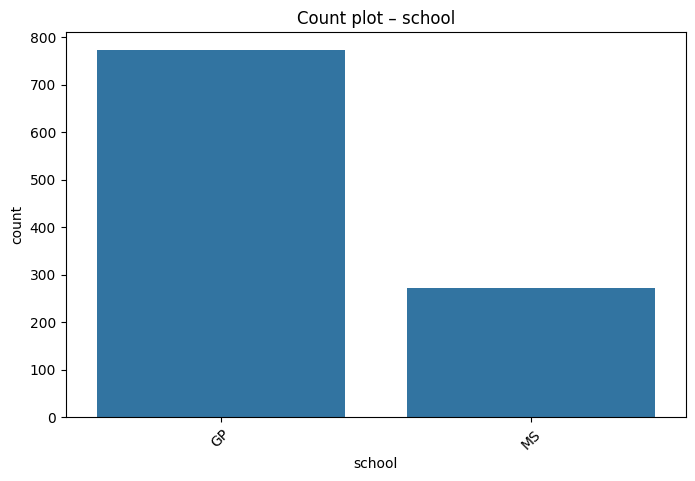

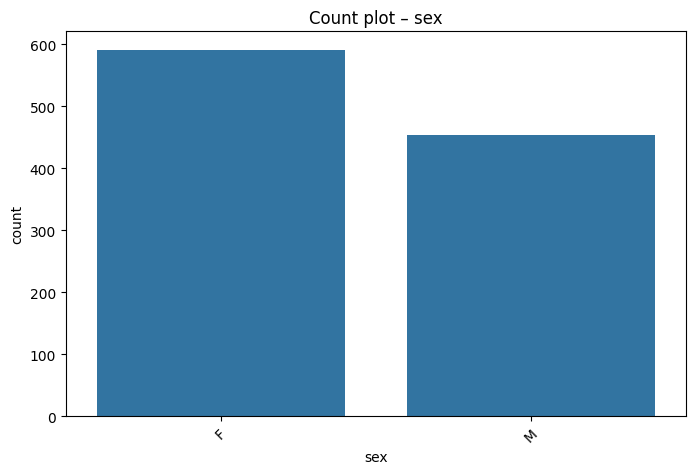

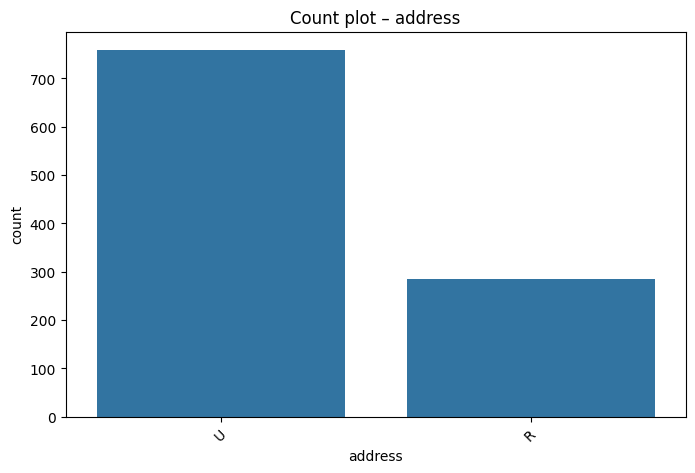

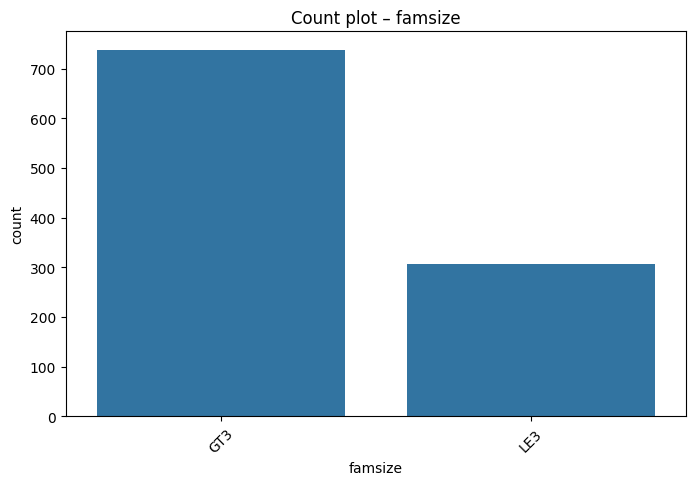

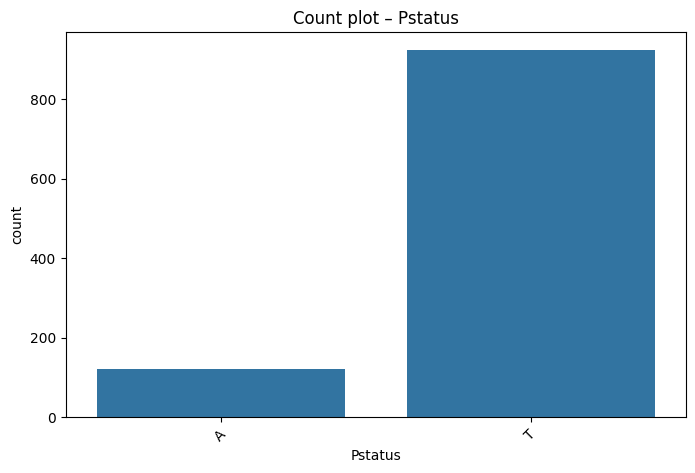

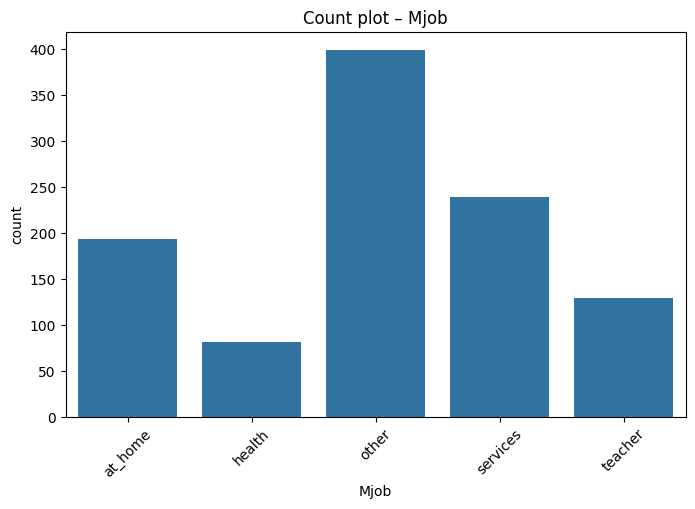

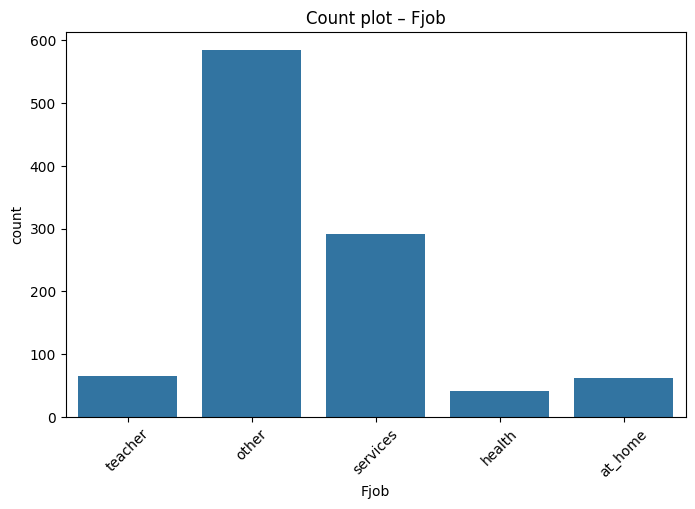

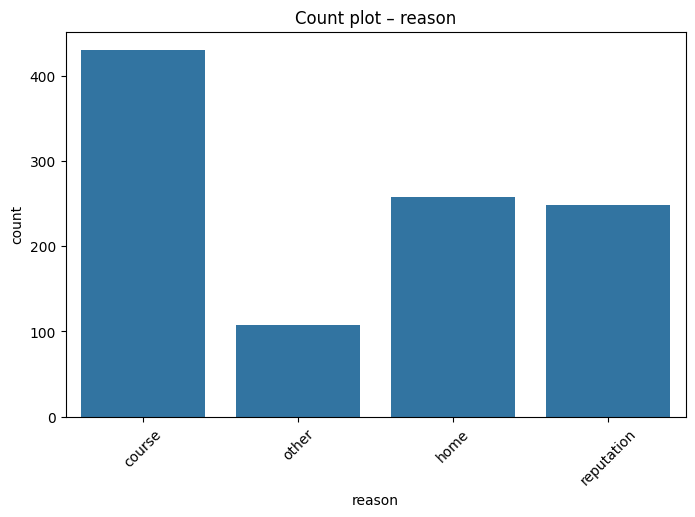

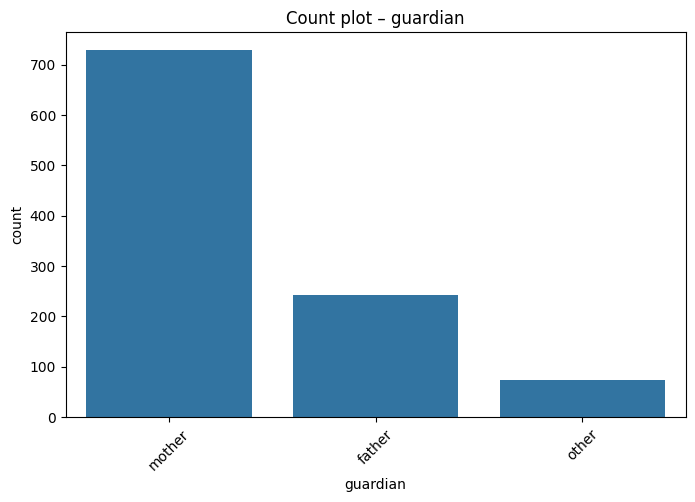

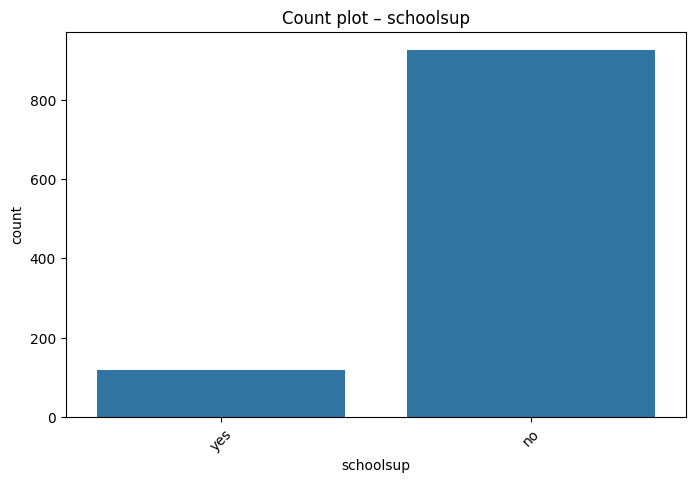

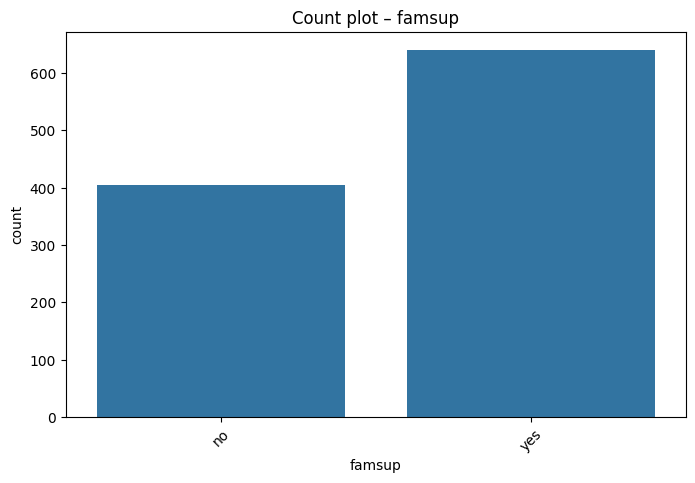

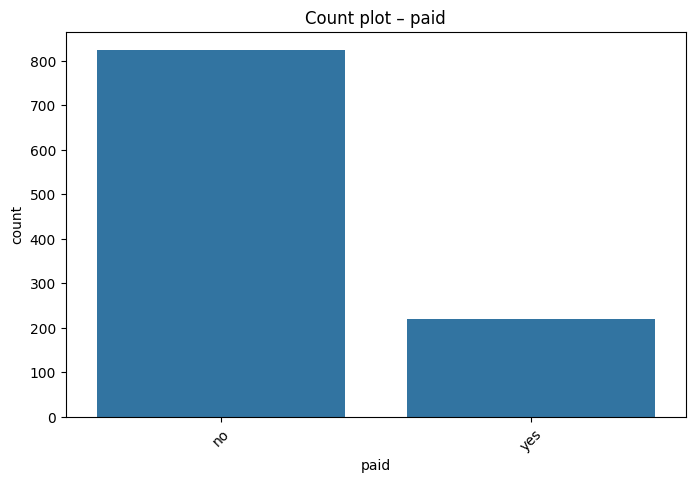

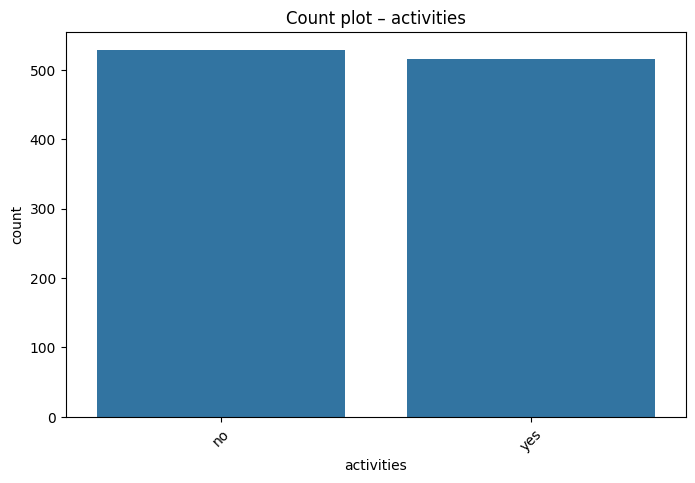

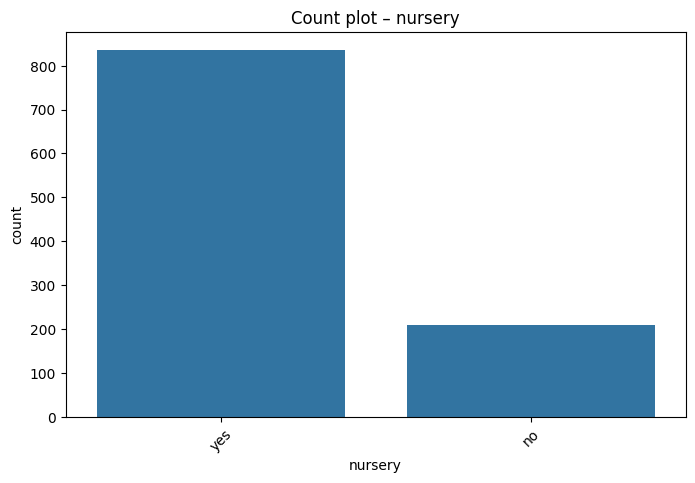

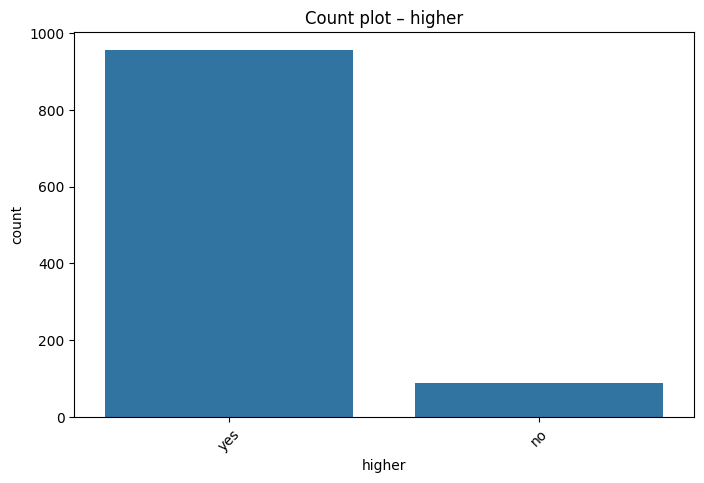

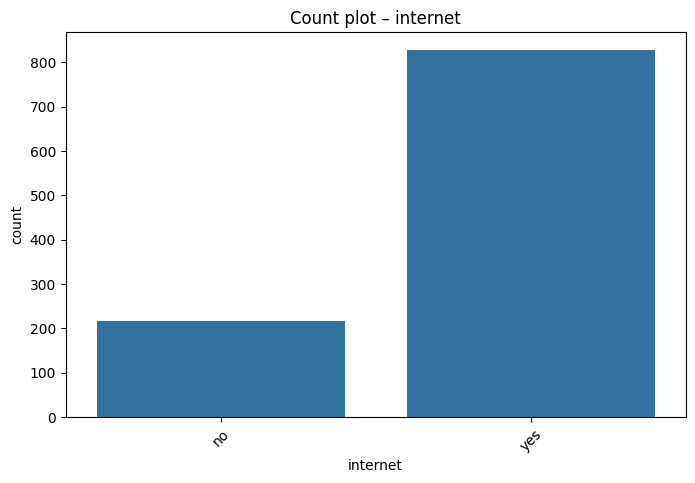

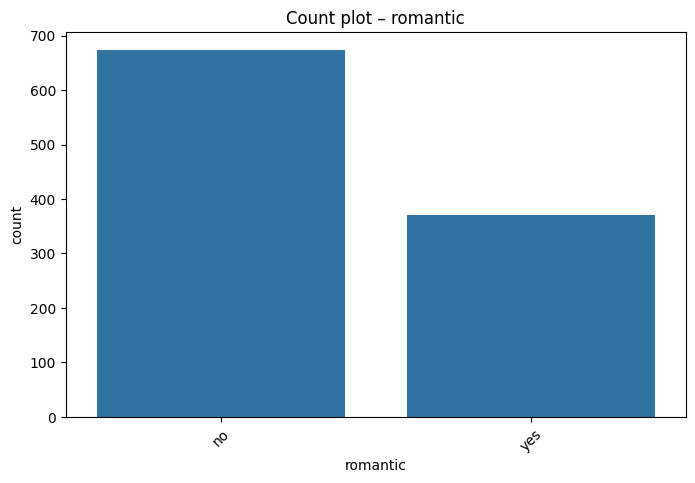

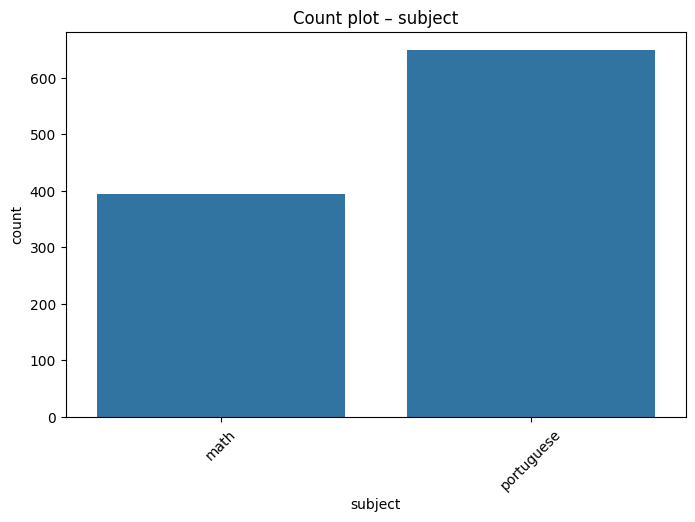

In [10]:
for col in nominal_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_merge, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Count plot – {col}")

Conteggio Variabili ordinali

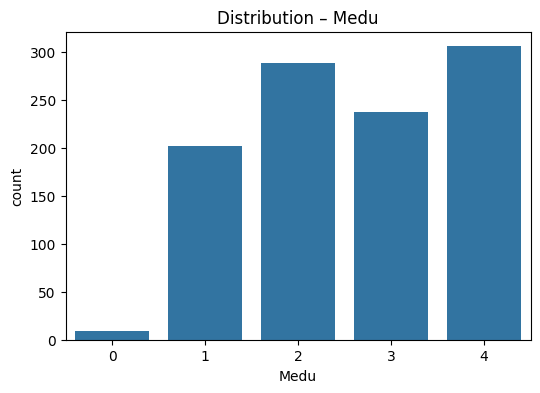

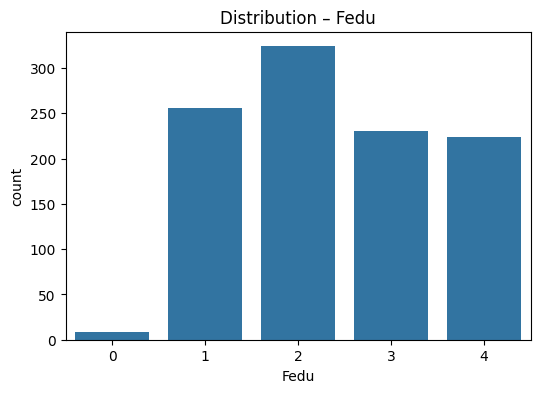

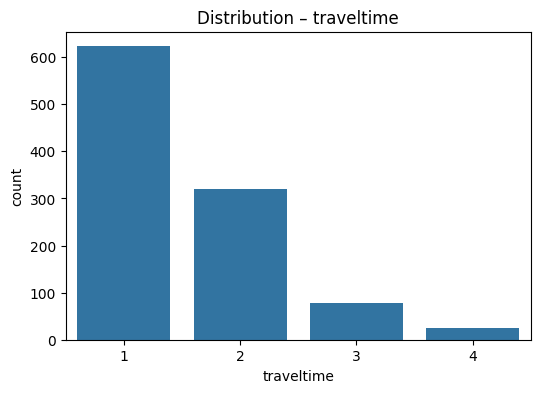

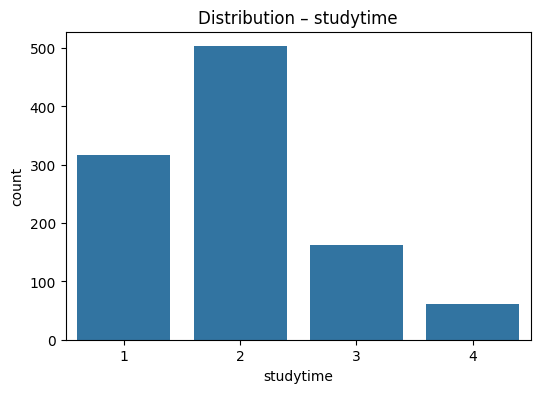

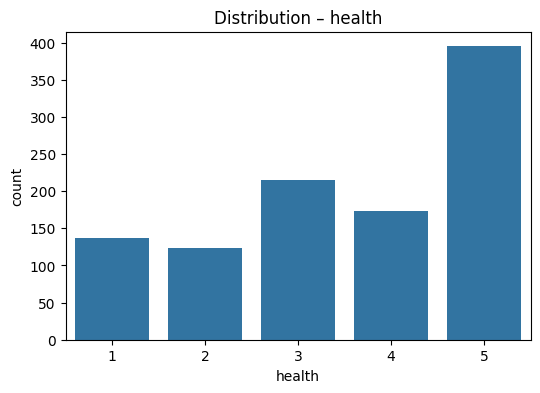

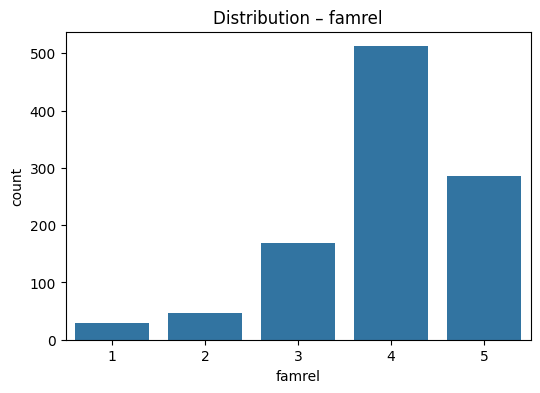

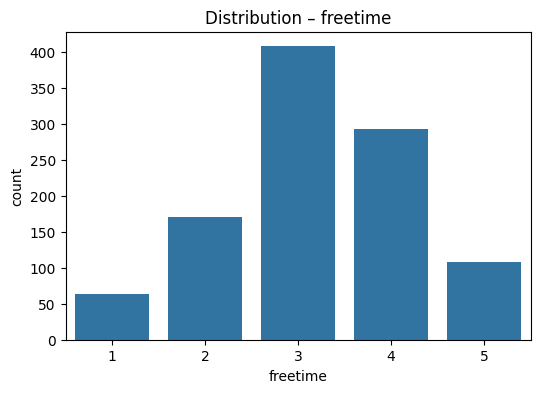

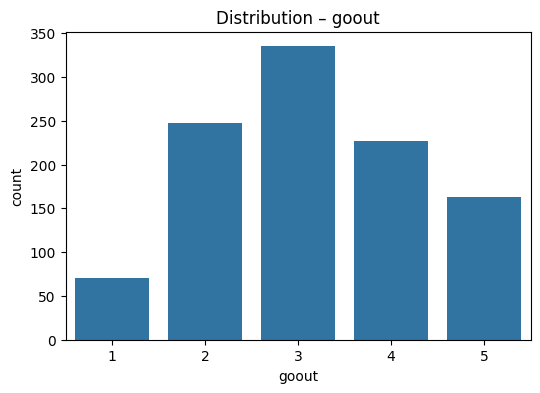

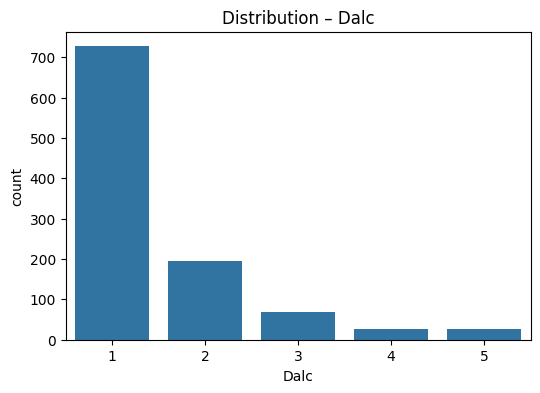

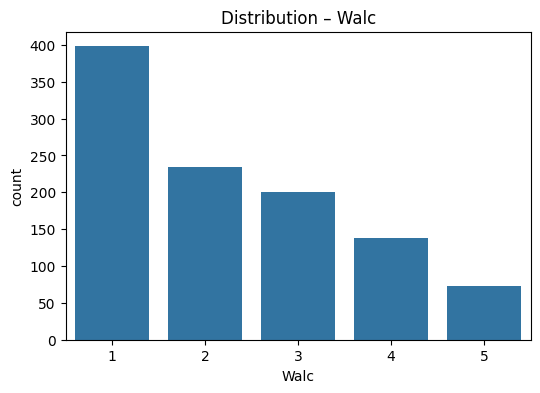

In [11]:
for col in ordinal_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_merge, x=col)
    plt.title(f"Distribution – {col}")

G3, il risultato dei finals exam, confrontato con le varie colonne ordinali.

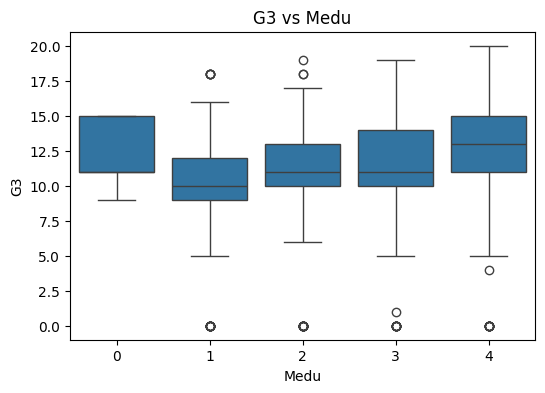

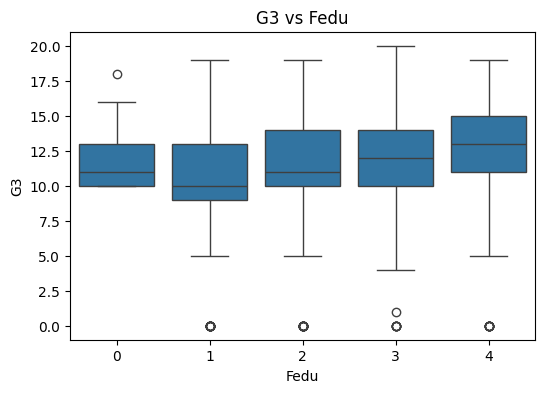

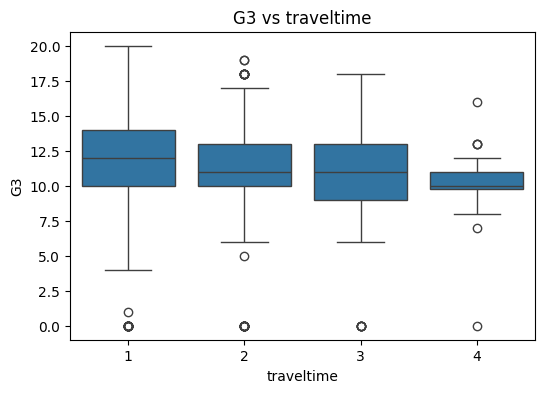

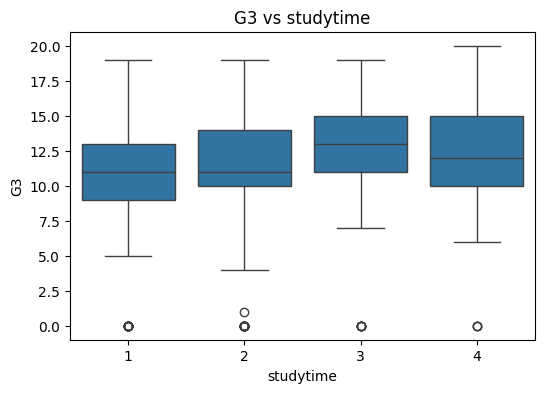

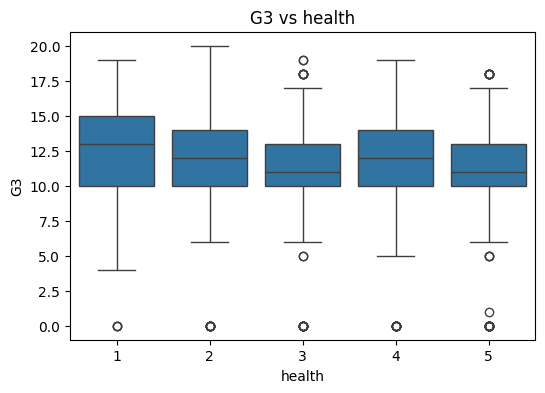

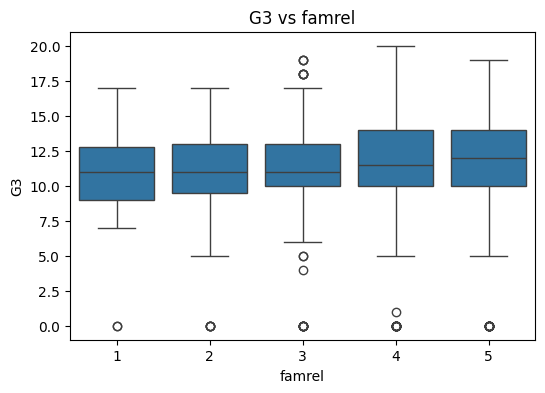

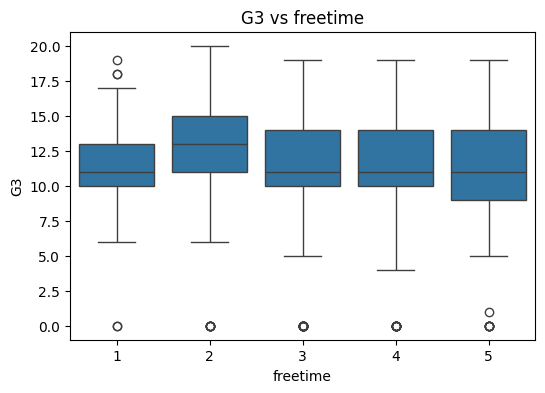

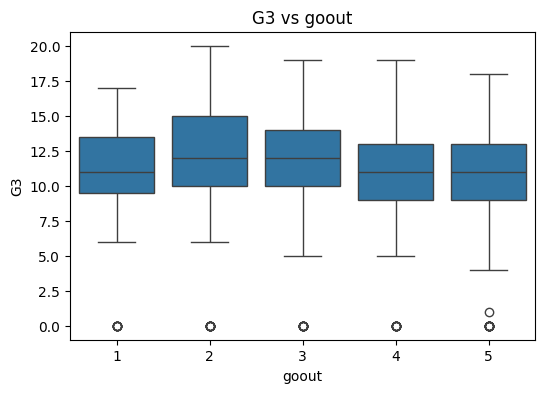

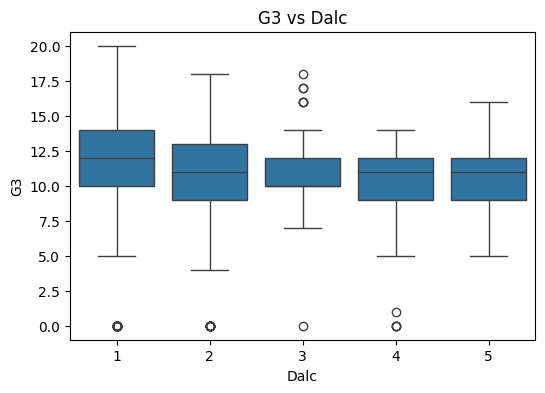

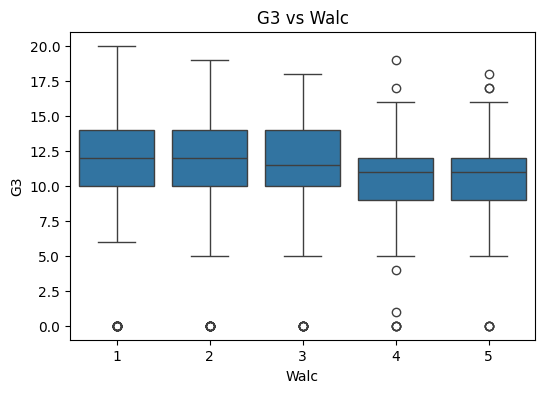

In [12]:
for col in ordinal_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_merge, x=col, y="G3")
    plt.title(f"G3 vs {col}")

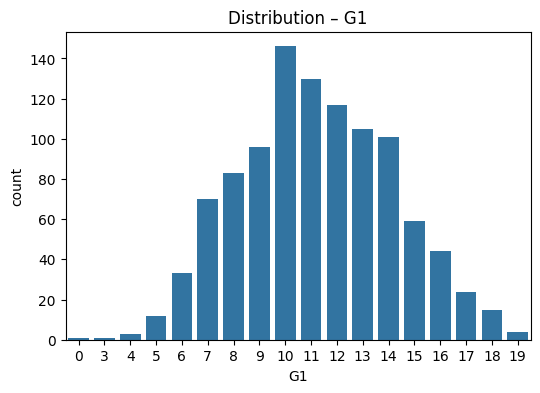

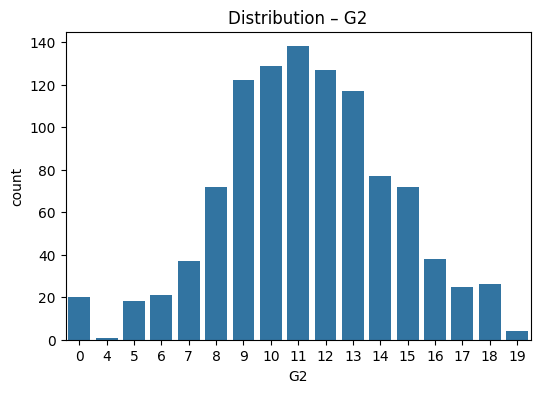

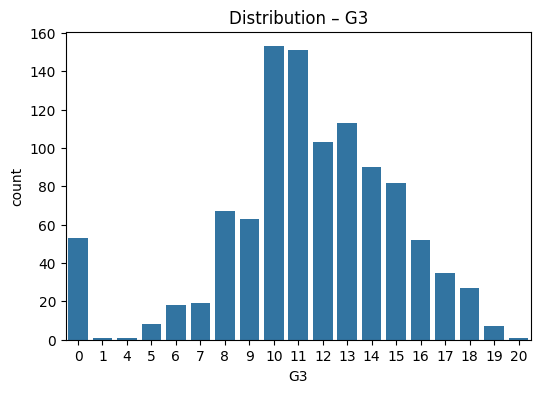

In [13]:
for col in target_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_merge, x=col)
    plt.title(f"Distribution – {col}")

In [16]:
df_merge.to_excel("df_merge.xlsx", index=False)